# 판다스 기초 연습 1

In [222]:
import pandas as pd
import numpy as np

In [223]:
data = np.array([[95,91],
                 [92,93],
                 [98,97],
                 [100,99]
                 ])

In [224]:
data.ndim

2

In [225]:
data.shape

(4, 2)

In [226]:
data.size

8

In [227]:
data.dtype

dtype('int32')

In [228]:
pd.DataFrame(data=data,columns=['class a','class b'])

,class a,class b
0,95,91
1,92,93
2,98,97
3,100,99


# 판다스 기초 연습 2

In [229]:
import pandas as pd
import numpy as np

In [230]:
data = np.array([[95,91],
                 [95,98],
                 [87,91],
                 [95,60]])

In [231]:
data.dtype

dtype('int32')

In [232]:
data.shape

(4, 2)

In [233]:
data.ndim

2

In [234]:
data.size

8

In [235]:
classdf = pd.DataFrame(data=data,columns=['class a','class b'])
classdf

,class a,class b
0,95,91
1,95,98
2,87,91
3,95,60


In [236]:
#인덱스를 찾기 위해서는 iloc
#몽키스패너 기호는 함수가 아니라는 뜻
classdf.iloc[0]

class a    95
class b    91
Name: 0, dtype: int32

In [237]:
type(classdf.iloc[0])

pandas.core.series.Series

In [238]:
classdf['class a']

0    95
1    95
2    87
3    95
Name: class a, dtype: int32

In [239]:
data2 = np.array([[87,85],
                 [89,90],
                ])

In [240]:
df2 = pd.DataFrame(data=data2,columns=['class a','class b'])
df2

,class a,class b
0,87,85
1,89,90


In [241]:
arr2d_2 = np.array([[100],
          [100],
          [100],
          [100]])

In [242]:
df4 = pd.DataFrame(data=arr2d_2,columns=['class d'])
df4

,class d
0,100
1,100
2,100
3,100


In [243]:
classdf.join(df4)

,class a,class b,class d
0,95,91,100
1,95,98,100
2,87,91,100
3,95,60,100


In [244]:
df2

,class a,class b
0,87,85
1,89,90


In [245]:
pd.concat([classdf,df2])

,class a,class b
0,95,91
1,95,98
2,87,91
3,95,60
0,87,85
1,89,90


In [246]:
pd.concat([classdf,df2],ignore_index=True)
# 위의 표와 비교한다
#이전 인덱스를 무시해서 결과값의 인덱스를 순서대로 만든다

,class a,class b
0,95,91
1,95,98
2,87,91
3,95,60
4,87,85
5,89,90


# 표를 만드는 일반적인 방법

In [247]:
data1 = {'id':['hong1','hong2','hong3','hong4','hong5'],
         'name':['홍일동','홍이동','홍삼동','홍사동','홍오동'],
         'height':[166,	168,170,172,174]}

In [248]:
pd.DataFrame(data1)

,id,name,height
0,hong1,홍일동,166
1,hong2,홍이동,168
2,hong3,홍삼동,170
3,hong4,홍사동,172
4,hong5,홍오동,174


# 표를 만드는 일반적인 방법 2

In [249]:
idx = ['hong1','hong2','hong3','hong4','hong5']

In [250]:
data2 = {'name':['홍일동','홍이동','홍삼동','홍사동','홍오동'],
         'height':[166,	168,170,172,174]}

In [251]:
good = pd.DataFrame(data2,index=pd.Index((idx),name='student'))
good

,name,height
student,,
hong1,홍일동,166
hong2,홍이동,168
hong3,홍삼동,170
hong4,홍사동,172
hong5,홍오동,174


In [252]:
good.columns

Index(['name', 'height'], dtype='object')

In [253]:
good.index

Index(['hong1', 'hong2', 'hong3', 'hong4', 'hong5'], dtype='object', name='student')

In [254]:
good.loc['hong3']

name      홍삼동
height    170
Name: hong3, dtype: object

# 표

주로 가로에는 성격,속성 > 이를 어길시 분석이 어려워진다

필요할시 > 전치 transpose

observation,sample.object: 객체 / 예.홍일 학생, 동길 학생

In [255]:
classdf.T #trnaspose

,0,1,2,3
class a,95,95,87,95
class b,91,98,91,60


In [256]:
df1 = np.array([['Harry Potter','Male',23],
                ['David Baker','Male',23],
                ['John Smith','Male',23],
                ['Juan Martinez','Male',23],
                ['Jane Connor','Female',23]])

In [257]:
df1 = ({'Name':["Harry Potter",	"David Baker",	"John Smith",	"Juan Martinez",	"Jane Connor"],
        'Gender':["Male","Male","Male","Male","Female"],
        'Age':[23,31,22,36,30],})	
							

In [258]:
final1 = pd.DataFrame(df1)
final1

,Name,Gender,Age
0,Harry Potter,Male,23
1,David Baker,Male,31
2,John Smith,Male,22
3,Juan Martinez,Male,36
4,Jane Connor,Female,30


In [259]:
df2 = ({'Name':["John Smith",	"Alex Du Bois",	"Joanne Rowling",	"Jane Connor"],
        'Position':["Intern","Team Lead","Manager","Manager"],
        'Wage':[25000,75000,90000,70000]})	

In [260]:
final2 = pd.DataFrame(df2)
final2

,Name,Position,Wage
0,John Smith,Intern,25000
1,Alex Du Bois,Team Lead,75000
2,Joanne Rowling,Manager,90000
3,Jane Connor,Manager,70000


In [261]:
pd.merge(final1,final2)

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


# 표 합치기

표를 합쳐서 발생하는 빈공간: 결측치 missing value	
    
합칠 때 왼쪽을 기준으로	

left join	

오른쪽은	

right join	

inner join	

outer join	

In [262]:
final1.merge(final2,on = 'Name',how = 'left')

,Name,Gender,Age,Position,Wage
0,Harry Potter,Male,23,NaN,NaN
1,David Baker,Male,31,NaN,NaN
2,John Smith,Male,22,Intern,25000.0
3,Juan Martinez,Male,36,NaN,NaN
4,Jane Connor,Female,30,Manager,70000.0


In [263]:
final1.merge(final2,on = 'Name',how = 'right')

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22.0,Intern,25000
1,Alex Du Bois,NaN,NaN,Team Lead,75000
2,Joanne Rowling,NaN,NaN,Manager,90000
3,Jane Connor,Female,30.0,Manager,70000


In [264]:
final1.merge(final2,on = 'Name',how = 'inner')

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


In [265]:
final1.merge(final2,on = 'Name',how = 'outer')

,Name,Gender,Age,Position,Wage
0,Alex Du Bois,NaN,NaN,Team Lead,75000.0
1,David Baker,Male,31.0,NaN,NaN
2,Harry Potter,Male,23.0,NaN,NaN
3,Jane Connor,Female,30.0,Manager,70000.0
4,Joanne Rowling,NaN,NaN,Manager,90000.0
5,John Smith,Male,22.0,Intern,25000.0
6,Juan Martinez,Male,36.0,NaN,NaN


# 엑셀에서 데이터 가져오기

In [266]:
seme1 = pd.read_excel('C:/ex/data/1학기.xlsx')
# 역슬래시를 꼭 슬래시로 바꾸기
seme1

,student,language,eng,math,학생별 평균,Unnamed: 5,Unnamed: 6
0,a,80,90,85,85.000000,NaN,NaN
1,b,90,95,95,93.333333,NaN,전체 평균
2,c,95,70,75,80.000000,NaN,84.0
3,d,70,85,80,78.333333,NaN,NaN
4,e,75,90,85,83.333333,NaN,NaN
5,과목별 평균,82,86,84,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,student,language,eng,math,NaN,NaN,NaN
9,c,95,70,75,NaN,NaN,NaN


In [267]:
seme2 = pd.read_excel('C:/ex/data/1학기.xlsx',sheet_name = '2학기')
seme2

,student,language,eng,math
0,a,80,50,85
1,b,90,50,85
2,c,95,50,85
3,d,70,50,85
4,e,75,50,85


In [268]:
seme1 = pd.read_excel('C:/ex/data/1학기.xlsx')
# 역슬래시를 꼭 슬래시로 바꾸기
seme1

,student,language,eng,math,학생별 평균,Unnamed: 5,Unnamed: 6
0,a,80,90,85,85.000000,NaN,NaN
1,b,90,95,95,93.333333,NaN,전체 평균
2,c,95,70,75,80.000000,NaN,84.0
3,d,70,85,80,78.333333,NaN,NaN
4,e,75,90,85,83.333333,NaN,NaN
5,과목별 평균,82,86,84,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,student,language,eng,math,NaN,NaN,NaN
9,c,95,70,75,NaN,NaN,NaN


In [269]:
# 학생별 평균
print(seme1.iloc[0].mean())
print(seme1.iloc[1].mean())
print(seme1.iloc[2].mean())
print(seme1.iloc[3].mean())

TypeError: can only concatenate str (not "int") to str

In [ ]:
seme1.language

student
a    80
b    90
c    95
d    70
e    75
Name: language, dtype: int64

In [ ]:
print(seme1.language.mean())
print(seme1.eng.mean())
print(seme1.math.mean())

82.0
86.0
84.0


In [ ]:
a = seme1.iloc[[i for i in range(4)]].mean()
b = np.mean(a)
b

84.16666666666667

In [ ]:
c = sorted(seme1.language,reverse=True)
c

[95, 90, 80, 75, 70]

In [ ]:
d = seme1.sort_values(by='language',ascending=False).reset_index(drop=True)
d

,language,eng,math
0,95,90,85
1,90,95,95
2,80,70,75
3,75,85,80
4,70,90,85


In [ ]:
seme1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   student   5 non-null      object
 1   language  5 non-null      int64 
 2   eng       5 non-null      int64 
 3   math      5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [ ]:
seme1.describe()

,language,eng,math
count,5.000000,5.000000,5.000000
mean,82.000000,86.000000,84.000000
std,10.368221,9.617692,7.416198
min,70.000000,70.000000,75.000000
25%,75.000000,85.000000,80.000000
50%,80.000000,90.000000,85.000000
75%,90.000000,90.000000,85.000000
max,95.000000,95.000000,95.000000


In [ ]:
# 전치
seme1.T

,0,1,2,3,4
student,a,b,c,d,e
language,80,90,95,70,75
eng,90,95,70,85,90
math,85,95,75,80,85


In [ ]:
# 전치
seme1t = seme1.transpose()
seme1t

,0,1,2,3,4
student,a,b,c,d,e
language,80,90,95,70,75
eng,90,95,70,85,90
math,85,95,75,80,85


In [ ]:
seme1t.describe()

,0,1,2,3,4
count,4,4,4,4,4
unique,4,3,4,4,4
top,a,95,c,d,e
freq,1,2,1,1,1


In [ ]:
seme1t.describe().values

array([[4, 4, 4, 4, 4],
       [4, 3, 4, 4, 4],
       ['a', 95, 'c', 'd', 'e'],
       [1, 2, 1, 1, 1]], dtype=object)

In [ ]:
seme1.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# 스튜던트 칼럼을 인덱스로 만들기
seme1in = seme1.set_index('student')
seme1in

,language,eng,math
student,,,
a,80,90,85
b,90,95,95
c,95,70,75
d,70,85,80
e,75,90,85


In [ ]:
seme1in.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object', name='student')

In [ ]:
seme1in.loc['a']

language    80
eng         90
math        85
Name: a, dtype: int64

In [ ]:
print(seme1in.loc['a'].mean())
print(seme1in.loc['b'].mean())
print(seme1in.loc['c'].mean())
print(seme1in.loc['d'].mean())
print(seme1in.loc['e'].mean())

85.0
93.33333333333333
80.0
78.33333333333333
83.33333333333333


In [ ]:
# 학생별 평균
print('%.2f' % seme1in.loc['a'].mean())
print('%.2f' %seme1in.loc['b'].mean())
print('%.2f' %seme1in.loc['c'].mean())
print('%.2f' %seme1in.loc['d'].mean())
print('%.2f' %seme1in.loc['e'].mean())

85.00
93.33
80.00
78.33
83.33


In [ ]:
seme1_drop = seme1.drop('student',axis=1)
seme1_drop

,language,eng,math
0,80,90,85
1,90,95,95
2,95,70,75
3,70,85,80
4,75,90,85


In [ ]:
seme1_drop.values

array([[80, 90, 85],
       [90, 95, 95],
       [95, 70, 75],
       [70, 85, 80],
       [75, 90, 85]], dtype=int64)

In [ ]:
seme1_drop.values.mean()

84.0

In [ ]:
# 국어 성적순 정렬
seme1.sort_values(by='language',ascending=False)

,student,language,eng,math
2,c,95,70,75
1,b,90,95,95
0,a,80,90,85
4,e,75,90,85
3,d,70,85,80


In [ ]:
seme1['stu_mean']=[seme1in.loc['a'].mean(),
 seme1in.loc['b'].mean(),
 seme1in.loc['c'].mean(),
 seme1in.loc['d'].mean(),
 seme1in.loc['e'].mean()]

seme1

,student,language,eng,math,stu_mean
0,a,80,90,85,85.000000
1,b,90,95,95,93.333333
2,c,95,70,75,80.000000
3,d,70,85,80,78.333333
4,e,75,90,85,83.333333


In [ ]:
seme1.sort_values(by='stu_mean',ascending=False)
# 오름차순의 거짓, 내림차순으로 보겠다

,student,language,eng,math,stu_mean
1,b,90,95,95,93.333333
0,a,80,90,85,85.000000
4,e,75,90,85,83.333333
2,c,95,70,75,80.000000
3,d,70,85,80,78.333333


# 데이터 요약시 유용한 피벗테이블

In [ ]:
import pandas as pd

In [ ]:
help(pd.pivot_table)
# aggregation 집계

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Hashable' = 'All', observed: 'bool | lib.NoDefault' = <no_default>, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.

    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.

    Parameters
    ----------
    data : DataFrame
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        Keys to group by on the pivot table index. If a list is passed,
        it can contain any of the other types (except list). If an array is
        passed, it must be the same length as the data and will be used in
        the same man

In [ ]:
seme2

,student,language,eng,math
0,a,80,50,85
1,b,90,50,85
2,c,95,50,85
3,d,70,50,85
4,e,75,50,85


In [ ]:
seme2_idx = seme2.set_index('student')

In [ ]:
seme2_idx.values

array([[80, 50, 85],
       [90, 50, 85],
       [95, 50, 85],
       [70, 50, 85],
       [75, 50, 85]], dtype=int64)

In [ ]:
seme2

,student,language,eng,math
0,a,80,50,85
1,b,90,50,85
2,c,95,50,85
3,d,70,50,85
4,e,75,50,85


In [ ]:
seme2_drop = seme2.drop('student',axis=1)
seme2_drop

,language,eng,math
0,80,50,85
1,90,50,85
2,95,50,85
3,70,50,85
4,75,50,85


In [ ]:
seme2_drop.values

array([[80, 50, 85],
       [90, 50, 85],
       [95, 50, 85],
       [70, 50, 85],
       [75, 50, 85]], dtype=int64)

In [ ]:
seme2_idx.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object', name='student')

In [ ]:
seme2.columns

Index(['student', 'language', 'eng', 'math'], dtype='object')

# 피벗테이블 기초

In [ ]:
data = { 'Date': ['2023-01-01', '2023-01-01', '2023-01-01','2023-01-02', '2023-01-02', '2023-01-03'],
        'Category': ['A', 'B', 'A', 'A', 'B', 'A'],
        'Value': [10, 20,50, 15, 25, 10] }

In [ ]:
df = pd.DataFrame(data)
df

,Date,Category,Value
0,2023-01-01,A,10
1,2023-01-01,B,20
2,2023-01-01,A,50
3,2023-01-02,A,15
4,2023-01-02,B,25
5,2023-01-03,A,10


In [ ]:
df.columns

Index(['Date', 'Category', 'Value'], dtype='object')

In [ ]:
pd.pivot_table(df,values='Value',index='Date',columns='Category',aggfunc='sum')

Category,A,B
Date,,
2023-01-01,60.0,20.0
2023-01-02,15.0,25.0
2023-01-03,10.0,NaN


# 피벗테이블 기초 연습

In [270]:
data = { 'Date': ['2023-01-01', '2023-01-01', '2023-01-01','2023-01-02', '2023-01-02', '2023-01-03'],
        'Category': ['A', 'B', 'A', 'A', 'B', 'A'],
        'Value': [10, 20,50, 15, 25, 10] }

In [271]:
df = pd.DataFrame(data)
df

,Date,Category,Value
0,2023-01-01,A,10
1,2023-01-01,B,20
2,2023-01-01,A,50
3,2023-01-02,A,15
4,2023-01-02,B,25
5,2023-01-03,A,10


# 데이터프레임객체.통계관련 메서드

In [279]:
seme2

,language,eng,math
0,80,50,85
1,90,50,85
2,95,50,85
3,70,50,85
4,75,50,85


# 상관과 회귀

상관: corelation

세로 관련

회귀


In [284]:
admoney = pd.read_excel('C:/Users/acy/Desktop/새 폴더/인공지능_기초수학.xlsx',sheet_name='상관_회귀')
admoney

,연도,광고비,매출액
0,2006,13,94
1,2007,8,70
2,2008,10,90
3,2009,15,100
4,2010,12,95
5,2011,15,100
6,2012,14,85
7,2013,15,95
8,2014,17,105
9,2015,19,105


In [288]:
pearson_corr = admoney['광고비'].corr(admoney['매출액'])
# 광고비와 매출액 사이의 피어슨 상관 계수 구하기
pearson_corr

0.8879209022406115

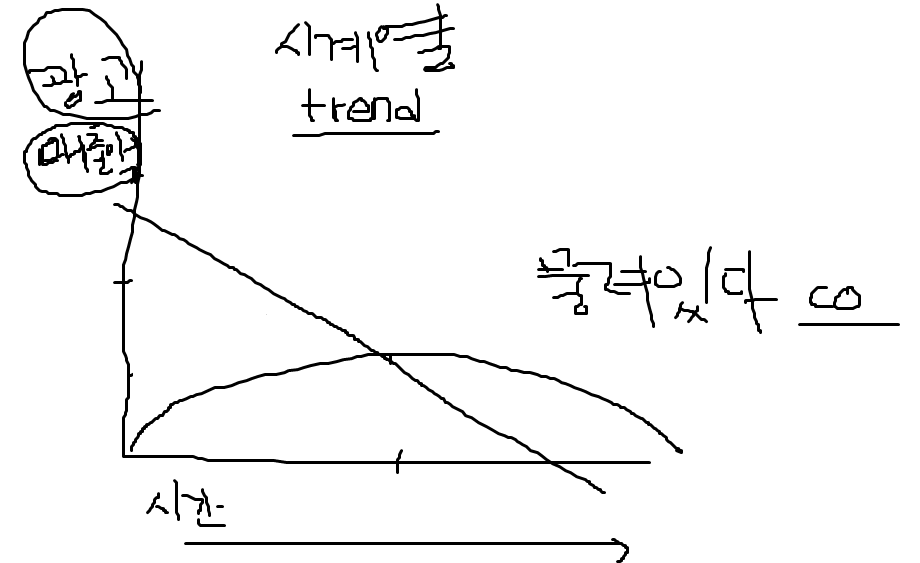